## Chapter 11

1. Build network with 20 hidden layers, 100 neurons. Use He initializaion, ELU activation.

2. Use NADAM optmization and early stopping.

3. Search for optimal learning rate any time the model hyperparameters or architecture is changed.

4. Add Batch Normalization (BN) and compare learning curves. Converge faster? Produce better model? Training speeds?

5. Replace Batch Normalization with SELU and make adjustments to ensure network self normalizes (standardize input features, use LeCun normal initialization, only contains sequence of dense layers).

6. Regularize with alpha dropout. 

7. See if you can get better 


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import Reshape

import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print(f'Train Shape is: {x_train.shape} \nTest Shape is: {x_test.shape}')

Train Shape is: (50000, 32, 32, 3) 
Test Shape is: (10000, 32, 32, 3)


In [4]:
# one-hot encode our targets
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# scale our features by simply dividing by 255, since these are all integers from 0-255
x_train_scale = x_train / 255.0
x_test_scale = x_test / 255.0

In [6]:
# create functional version of our model for sklearn classifier wrapper
def build_model(learning_rate=3e-3):
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    for _ in range(21):
        model.add(Dense(100, kernel_initializer='he_normal'))
        model.add(ELU(alpha=1.0))
    model.add(Dense(10, activation='softmax'))
    optimizer = tf.keras.optimizers.Nadam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    return model

In [7]:
keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [8]:
param_distribs = {"learning_rate": [.0001, .001, .01, .1, .4, 1]}

In [6]:
early_stopping_cb = EarlyStopping(patience=15, restore_best_weights=True)

In [12]:
grid_search_cv = GridSearchCV(keras_clf, param_distribs, cv=3)

In [13]:
history = grid_search_cv.fit(x_train_scale, y_train, validation_split=.20, epochs=100, callbacks=[early_stopping_cb])

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 13s 489us/sample - loss: 2.2013 - accuracy: 0.2042 - val_loss: 2.1004 - val_accuracy: 0.2214
Epoch 2/100
26666/26666 [==============================] - 9s 353us/sample - loss: 1.9192 - accuracy: 0.2965 - val_loss: 2.0552 - val_accuracy: 0.2725
Epoch 3/100
26666/26666 [==============================] - 8s 307us/sample - loss: 1.8466 - accuracy: 0.3277 - val_loss: 1.8968 - val_accuracy: 0.3172
Epoch 4/100
26666/26666 [==============================] - 10s 389us/sample - loss: 1.8043 - accuracy: 0.3487 - val_loss: 1.7971 - val_accuracy: 0.3472
Epoch 5/100
26666/26666 [==============================] - 10s 359us/sample - loss: 1.7639 - accuracy: 0.3644 - val_loss: 1.8328 - val_accuracy: 0.3451
Epoch 6/100
26666/26666 [==============================] - 9s 342us/sample - loss: 1.7384 - accuracy: 0.3756 - val_loss: 1.8500 - val_accuracy: 0.3360
Epoch 7/100
26666/26666 [=================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 12s 460us/sample - loss: 2.1404 - accuracy: 0.2188 - val_loss: 2.0813 - val_accuracy: 0.2349
Epoch 2/100
26666/26666 [==============================] - 9s 354us/sample - loss: 1.9153 - accuracy: 0.3009 - val_loss: 2.0724 - val_accuracy: 0.2697
Epoch 3/100
26666/26666 [==============================] - 10s 361us/sample - loss: 1.8475 - accuracy: 0.3283 - val_loss: 1.8030 - val_accuracy: 0.3474
Epoch 4/100
26666/26666 [==============================] - 9s 332us/sample - loss: 1.8013 - accuracy: 0.3493 - val_loss: 1.8536 - val_accuracy: 0.3235
Epoch 5/100
26666/26666 [==============================] - 8s 314us/sample - loss: 1.7661 - accuracy: 0.3653 - val_loss: 1.8601 - val_accuracy: 0.3175
Epoch 6/100
26666/26666 [==============================] - 8s 313us/sample - loss: 1.7453 - accuracy: 0.3705 - val_loss: 1.8502 - val_accuracy: 0.3502
Epoch 7/100
26666/26666 [==================

Train on 26667 samples, validate on 6667 samples
Epoch 1/100
26667/26667 [==============================] - 12s 446us/sample - loss: 2.1798 - accuracy: 0.2044 - val_loss: 2.0524 - val_accuracy: 0.2473
Epoch 2/100
26667/26667 [==============================] - 9s 328us/sample - loss: 1.9341 - accuracy: 0.2863 - val_loss: 1.9664 - val_accuracy: 0.2607
Epoch 3/100
26667/26667 [==============================] - 9s 322us/sample - loss: 1.8688 - accuracy: 0.3193 - val_loss: 1.9253 - val_accuracy: 0.3142
Epoch 4/100
26667/26667 [==============================] - 9s 343us/sample - loss: 1.8194 - accuracy: 0.3385 - val_loss: 1.8567 - val_accuracy: 0.3196
Epoch 5/100
26667/26667 [==============================] - 9s 329us/sample - loss: 1.7853 - accuracy: 0.3520 - val_loss: 1.8502 - val_accuracy: 0.3210
Epoch 6/100
26667/26667 [==============================] - 8s 319us/sample - loss: 1.7512 - accuracy: 0.3658 - val_loss: 1.7799 - val_accuracy: 0.3591
Epoch 7/100
26667/26667 [===================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 12s 453us/sample - loss: 2.2063 - accuracy: 0.2039 - val_loss: 2.1457 - val_accuracy: 0.2089
Epoch 2/100
26666/26666 [==============================] - 8s 312us/sample - loss: 1.9301 - accuracy: 0.2907 - val_loss: 2.0106 - val_accuracy: 0.2601
Epoch 3/100
26666/26666 [==============================] - 9s 347us/sample - loss: 1.8644 - accuracy: 0.3150 - val_loss: 1.8785 - val_accuracy: 0.3100
Epoch 4/100
26666/26666 [==============================] - 8s 306us/sample - loss: 1.8167 - accuracy: 0.3368 - val_loss: 1.8989 - val_accuracy: 0.3004
Epoch 5/100
26666/26666 [==============================] - 8s 307us/sample - loss: 1.7820 - accuracy: 0.3535 - val_loss: 2.0142 - val_accuracy: 0.3186
Epoch 6/100
26666/26666 [==============================] - 9s 327us/sample - loss: 1.7481 - accuracy: 0.3655 - val_loss: 1.8624 - val_accuracy: 0.3180
Epoch 7/100
26666/26666 [===================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 13s 472us/sample - loss: 2.1810 - accuracy: 0.2006 - val_loss: 1.9602 - val_accuracy: 0.2748
Epoch 2/100
26666/26666 [==============================] - 9s 338us/sample - loss: 1.9410 - accuracy: 0.2861 - val_loss: 1.9538 - val_accuracy: 0.2862
Epoch 3/100
26666/26666 [==============================] - 9s 325us/sample - loss: 1.8760 - accuracy: 0.3139 - val_loss: 1.9716 - val_accuracy: 0.2880
Epoch 4/100
26666/26666 [==============================] - 8s 318us/sample - loss: 1.8349 - accuracy: 0.3327 - val_loss: 1.8794 - val_accuracy: 0.3076
Epoch 5/100
26666/26666 [==============================] - 9s 320us/sample - loss: 1.7914 - accuracy: 0.3477 - val_loss: 1.7761 - val_accuracy: 0.3567
Epoch 6/100
26666/26666 [==============================] - 9s 320us/sample - loss: 1.7625 - accuracy: 0.3638 - val_loss: 1.8124 - val_accuracy: 0.3346
Epoch 7/100
26666/26666 [===================

Train on 26667 samples, validate on 6667 samples
Epoch 1/100
26667/26667 [==============================] - 12s 460us/sample - loss: 2.2263 - accuracy: 0.2061 - val_loss: 2.2424 - val_accuracy: 0.2062
Epoch 2/100
26667/26667 [==============================] - 10s 383us/sample - loss: 1.9242 - accuracy: 0.2959 - val_loss: 1.9032 - val_accuracy: 0.3019
Epoch 3/100
26667/26667 [==============================] - 11s 406us/sample - loss: 1.8499 - accuracy: 0.3233 - val_loss: 1.9208 - val_accuracy: 0.2988
Epoch 4/100
26667/26667 [==============================] - 12s 454us/sample - loss: 1.8026 - accuracy: 0.3444 - val_loss: 1.8758 - val_accuracy: 0.3204
Epoch 5/100
26667/26667 [==============================] - 10s 377us/sample - loss: 1.7641 - accuracy: 0.3614 - val_loss: 1.8952 - val_accuracy: 0.3495
Epoch 6/100
26667/26667 [==============================] - 9s 331us/sample - loss: 1.7336 - accuracy: 0.3736 - val_loss: 1.7763 - val_accuracy: 0.3618
Epoch 7/100
26667/26667 [===============

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 11s 412us/sample - loss: 2.2008 - accuracy: 0.1973 - val_loss: 2.3012 - val_accuracy: 0.1767
Epoch 2/100
26666/26666 [==============================] - 8s 304us/sample - loss: 1.9300 - accuracy: 0.2869 - val_loss: 1.9530 - val_accuracy: 0.2634
Epoch 3/100
26666/26666 [==============================] - 8s 303us/sample - loss: 1.8534 - accuracy: 0.3221 - val_loss: 1.8933 - val_accuracy: 0.3144
Epoch 4/100
26666/26666 [==============================] - 8s 310us/sample - loss: 1.8086 - accuracy: 0.3422 - val_loss: 1.8328 - val_accuracy: 0.3424
Epoch 5/100
26666/26666 [==============================] - 8s 287us/sample - loss: 1.7751 - accuracy: 0.3551 - val_loss: 1.8371 - val_accuracy: 0.3502
Epoch 6/100
26666/26666 [==============================] - 7s 275us/sample - loss: 1.7488 - accuracy: 0.3655 - val_loss: 1.7386 - val_accuracy: 0.3703
Epoch 7/100
26666/26666 [===================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 10s 389us/sample - loss: 2.1806 - accuracy: 0.2099 - val_loss: 1.9896 - val_accuracy: 0.2545
Epoch 2/100
26666/26666 [==============================] - 7s 270us/sample - loss: 1.9301 - accuracy: 0.2941 - val_loss: 1.9728 - val_accuracy: 0.2803
Epoch 3/100
26666/26666 [==============================] - 8s 312us/sample - loss: 1.8611 - accuracy: 0.3259 - val_loss: 1.9789 - val_accuracy: 0.2782
Epoch 4/100
26666/26666 [==============================] - 7s 273us/sample - loss: 1.8198 - accuracy: 0.3409 - val_loss: 1.8462 - val_accuracy: 0.3444
Epoch 5/100
26666/26666 [==============================] - 7s 267us/sample - loss: 1.7832 - accuracy: 0.3560 - val_loss: 1.7868 - val_accuracy: 0.3457
Epoch 6/100
26666/26666 [==============================] - 8s 295us/sample - loss: 1.7578 - accuracy: 0.3642 - val_loss: 1.8226 - val_accuracy: 0.3357
Epoch 7/100
26666/26666 [===================

Train on 26667 samples, validate on 6667 samples
Epoch 1/100
26667/26667 [==============================] - 12s 432us/sample - loss: 2.1683 - accuracy: 0.2150 - val_loss: 2.1883 - val_accuracy: 0.2163
Epoch 2/100
26667/26667 [==============================] - 8s 281us/sample - loss: 1.9268 - accuracy: 0.2947 - val_loss: 2.0070 - val_accuracy: 0.2547
Epoch 3/100
26667/26667 [==============================] - 8s 285us/sample - loss: 1.8550 - accuracy: 0.3225 - val_loss: 2.3250 - val_accuracy: 0.2316
Epoch 4/100
26667/26667 [==============================] - 8s 290us/sample - loss: 1.8169 - accuracy: 0.3400 - val_loss: 1.8126 - val_accuracy: 0.3358
Epoch 5/100
26667/26667 [==============================] - 8s 283us/sample - loss: 1.7696 - accuracy: 0.3598 - val_loss: 1.9698 - val_accuracy: 0.3066
Epoch 6/100
26667/26667 [==============================] - 8s 286us/sample - loss: 1.7557 - accuracy: 0.3632 - val_loss: 1.8060 - val_accuracy: 0.3444
Epoch 7/100
26667/26667 [===================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 10s 393us/sample - loss: 2.2201 - accuracy: 0.1992 - val_loss: 2.1619 - val_accuracy: 0.2106
Epoch 2/100
26666/26666 [==============================] - 7s 275us/sample - loss: 1.9266 - accuracy: 0.2929 - val_loss: 1.9903 - val_accuracy: 0.2772
Epoch 3/100
26666/26666 [==============================] - 8s 296us/sample - loss: 1.8511 - accuracy: 0.3284 - val_loss: 1.8231 - val_accuracy: 0.3364
Epoch 4/100
26666/26666 [==============================] - 7s 274us/sample - loss: 1.8072 - accuracy: 0.3427 - val_loss: 1.7668 - val_accuracy: 0.3457
Epoch 5/100
26666/26666 [==============================] - 7s 273us/sample - loss: 1.7658 - accuracy: 0.3576 - val_loss: 1.8195 - val_accuracy: 0.3228
Epoch 6/100
26666/26666 [==============================] - 7s 280us/sample - loss: 1.7292 - accuracy: 0.3758 - val_loss: 1.9347 - val_accuracy: 0.3115
Epoch 7/100
26666/26666 [===================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 10s 393us/sample - loss: 2.1981 - accuracy: 0.1980 - val_loss: 2.1312 - val_accuracy: 0.2434
Epoch 2/100
26666/26666 [==============================] - 8s 316us/sample - loss: 1.9436 - accuracy: 0.2863 - val_loss: 1.9427 - val_accuracy: 0.2961
Epoch 3/100
26666/26666 [==============================] - 8s 286us/sample - loss: 1.8735 - accuracy: 0.3141 - val_loss: 1.9755 - val_accuracy: 0.2920
Epoch 4/100
26666/26666 [==============================] - 8s 286us/sample - loss: 1.8292 - accuracy: 0.3390 - val_loss: 2.0922 - val_accuracy: 0.2872
Epoch 5/100
26666/26666 [==============================] - 8s 293us/sample - loss: 1.7880 - accuracy: 0.3518 - val_loss: 1.8240 - val_accuracy: 0.3346
Epoch 6/100
26666/26666 [==============================] - 9s 323us/sample - loss: 1.7556 - accuracy: 0.3666 - val_loss: 1.8498 - val_accuracy: 0.3237
Epoch 7/100
26666/26666 [===================

Train on 26667 samples, validate on 6667 samples
Epoch 1/100
26667/26667 [==============================] - 10s 381us/sample - loss: 2.1979 - accuracy: 0.1954 - val_loss: 2.1888 - val_accuracy: 0.2232
Epoch 2/100
26667/26667 [==============================] - 8s 286us/sample - loss: 1.9416 - accuracy: 0.2833 - val_loss: 1.9995 - val_accuracy: 0.2926
Epoch 3/100
26667/26667 [==============================] - 7s 276us/sample - loss: 1.8673 - accuracy: 0.3181 - val_loss: 1.8333 - val_accuracy: 0.3298
Epoch 4/100
26667/26667 [==============================] - 9s 330us/sample - loss: 1.8171 - accuracy: 0.3353 - val_loss: 2.0306 - val_accuracy: 0.2823
Epoch 5/100
26667/26667 [==============================] - 9s 335us/sample - loss: 1.7701 - accuracy: 0.3582 - val_loss: 1.8066 - val_accuracy: 0.3525
Epoch 6/100
26667/26667 [==============================] - 8s 304us/sample - loss: 1.7352 - accuracy: 0.3716 - val_loss: 1.8740 - val_accuracy: 0.3261
Epoch 7/100
26667/26667 [===================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 11s 396us/sample - loss: 2.1863 - accuracy: 0.2109 - val_loss: 2.0378 - val_accuracy: 0.2589
Epoch 2/100
26666/26666 [==============================] - 7s 279us/sample - loss: 1.9126 - accuracy: 0.3046 - val_loss: 1.9974 - val_accuracy: 0.2571
Epoch 3/100
26666/26666 [==============================] - 8s 284us/sample - loss: 1.8466 - accuracy: 0.3270 - val_loss: 1.8712 - val_accuracy: 0.2889
Epoch 4/100
26666/26666 [==============================] - 9s 334us/sample - loss: 1.7991 - accuracy: 0.3495 - val_loss: 1.8910 - val_accuracy: 0.3120
Epoch 5/100
26666/26666 [==============================] - 9s 348us/sample - loss: 1.7535 - accuracy: 0.3677 - val_loss: 1.8494 - val_accuracy: 0.3387
Epoch 6/100
26666/26666 [==============================] - 9s 321us/sample - loss: 1.7314 - accuracy: 0.3762 - val_loss: 1.7675 - val_accuracy: 0.3748
Epoch 7/100
26666/26666 [===================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 11s 405us/sample - loss: 2.1955 - accuracy: 0.2010 - val_loss: 2.0809 - val_accuracy: 0.2139
Epoch 2/100
26666/26666 [==============================] - 8s 293us/sample - loss: 1.9507 - accuracy: 0.2793 - val_loss: 1.9717 - val_accuracy: 0.2829
Epoch 3/100
26666/26666 [==============================] - 8s 318us/sample - loss: 1.8820 - accuracy: 0.3124 - val_loss: 1.9559 - val_accuracy: 0.2953
Epoch 4/100
26666/26666 [==============================] - 8s 309us/sample - loss: 1.8192 - accuracy: 0.3365 - val_loss: 1.9373 - val_accuracy: 0.2892
Epoch 5/100
26666/26666 [==============================] - 8s 305us/sample - loss: 1.7817 - accuracy: 0.3503 - val_loss: 1.8208 - val_accuracy: 0.3420
Epoch 6/100
26666/26666 [==============================] - 8s 303us/sample - loss: 1.7469 - accuracy: 0.3670 - val_loss: 1.9207 - val_accuracy: 0.2989
Epoch 7/100
26666/26666 [===================

Train on 26667 samples, validate on 6667 samples
Epoch 1/100
26667/26667 [==============================] - 12s 443us/sample - loss: 2.1673 - accuracy: 0.2007 - val_loss: 2.0341 - val_accuracy: 0.2599
Epoch 2/100
26667/26667 [==============================] - 8s 310us/sample - loss: 1.9172 - accuracy: 0.2953 - val_loss: 1.9073 - val_accuracy: 0.2811
Epoch 3/100
26667/26667 [==============================] - 8s 299us/sample - loss: 1.8500 - accuracy: 0.3264 - val_loss: 1.8483 - val_accuracy: 0.3318
Epoch 4/100
26667/26667 [==============================] - 11s 411us/sample - loss: 1.8051 - accuracy: 0.3424 - val_loss: 1.8618 - val_accuracy: 0.3241
Epoch 5/100
26667/26667 [==============================] - 11s 415us/sample - loss: 1.7677 - accuracy: 0.3576 - val_loss: 1.8370 - val_accuracy: 0.3420
Epoch 6/100
26667/26667 [==============================] - 10s 367us/sample - loss: 1.7345 - accuracy: 0.3741 - val_loss: 1.7905 - val_accuracy: 0.3496
Epoch 7/100
26667/26667 [================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 12s 467us/sample - loss: 2.1865 - accuracy: 0.2010 - val_loss: 2.0737 - val_accuracy: 0.2263
Epoch 2/100
26666/26666 [==============================] - 8s 288us/sample - loss: 1.9478 - accuracy: 0.2809 - val_loss: 1.9510 - val_accuracy: 0.2718
Epoch 3/100
26666/26666 [==============================] - 8s 287us/sample - loss: 1.8687 - accuracy: 0.3142 - val_loss: 1.9193 - val_accuracy: 0.3067
Epoch 4/100
26666/26666 [==============================] - 8s 293us/sample - loss: 1.8232 - accuracy: 0.3338 - val_loss: 1.8863 - val_accuracy: 0.3138
Epoch 5/100
26666/26666 [==============================] - 8s 317us/sample - loss: 1.7818 - accuracy: 0.3527 - val_loss: 2.1264 - val_accuracy: 0.2553
Epoch 6/100
26666/26666 [==============================] - 8s 293us/sample - loss: 1.7481 - accuracy: 0.3679 - val_loss: 1.8457 - val_accuracy: 0.3381
Epoch 7/100
26666/26666 [===================

Train on 26666 samples, validate on 6667 samples
Epoch 1/100
26666/26666 [==============================] - 14s 521us/sample - loss: 2.2119 - accuracy: 0.1931 - val_loss: 2.0229 - val_accuracy: 0.2668
Epoch 2/100
26666/26666 [==============================] - 9s 352us/sample - loss: 1.9441 - accuracy: 0.2806 - val_loss: 1.9008 - val_accuracy: 0.3108
Epoch 3/100
26666/26666 [==============================] - 10s 365us/sample - loss: 1.8769 - accuracy: 0.3153 - val_loss: 1.9512 - val_accuracy: 0.2953
Epoch 4/100
26666/26666 [==============================] - 8s 300us/sample - loss: 1.8262 - accuracy: 0.3402 - val_loss: 1.9036 - val_accuracy: 0.3118
Epoch 5/100
26666/26666 [==============================] - 8s 310us/sample - loss: 1.7863 - accuracy: 0.3516 - val_loss: 2.0396 - val_accuracy: 0.2742
Epoch 6/100
26666/26666 [==============================] - 8s 302us/sample - loss: 1.7493 - accuracy: 0.3672 - val_loss: 1.8111 - val_accuracy: 0.3411
Epoch 7/100
26666/26666 [==================

Train on 26667 samples, validate on 6667 samples
Epoch 1/100
26667/26667 [==============================] - 11s 409us/sample - loss: 2.1785 - accuracy: 0.2046 - val_loss: 2.2154 - val_accuracy: 0.2023
Epoch 2/100
26667/26667 [==============================] - 8s 298us/sample - loss: 1.9228 - accuracy: 0.2945 - val_loss: 1.9637 - val_accuracy: 0.2775
Epoch 3/100
26667/26667 [==============================] - 8s 299us/sample - loss: 1.8465 - accuracy: 0.3247 - val_loss: 1.8854 - val_accuracy: 0.3313
Epoch 4/100
26667/26667 [==============================] - 13s 490us/sample - loss: 1.8030 - accuracy: 0.3489 - val_loss: 1.7927 - val_accuracy: 0.3490
Epoch 5/100
26667/26667 [==============================] - 11s 429us/sample - loss: 1.7699 - accuracy: 0.3562 - val_loss: 1.8238 - val_accuracy: 0.3379
Epoch 6/100
26667/26667 [==============================] - 13s 502us/sample - loss: 1.7323 - accuracy: 0.3723 - val_loss: 2.2309 - val_accuracy: 0.2415
Epoch 7/100
26667/26667 [================

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 15s 372us/sample - loss: 2.0939 - accuracy: 0.2307 - val_loss: 1.9466 - val_accuracy: 0.2998
Epoch 2/100
40000/40000 [==============================] - 12s 300us/sample - loss: 1.8823 - accuracy: 0.3036 - val_loss: 1.8162 - val_accuracy: 0.3335
Epoch 3/100
40000/40000 [==============================] - 14s 341us/sample - loss: 1.8176 - accuracy: 0.3372 - val_loss: 1.7800 - val_accuracy: 0.3512
Epoch 4/100
40000/40000 [==============================] - 12s 310us/sample - loss: 1.7618 - accuracy: 0.3620 - val_loss: 1.7275 - val_accuracy: 0.3843
Epoch 5/100
40000/40000 [==============================] - 13s 314us/sample - loss: 1.7258 - accuracy: 0.3778 - val_loss: 1.6803 - val_accuracy: 0.3931
Epoch 6/100
40000/40000 [==============================] - 12s 307us/sample - loss: 1.6931 - accuracy: 0.3921 - val_loss: 1.6760 - val_accuracy: 0.3968
Epoch 7/100
40000/40000 [=============

In [15]:
# let's see what's in the cv_results_ dict
pd.DataFrame(history.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     303.922838    100.299950         1.601510        0.075741   
1     291.530068     62.723667         1.555067        0.122628   
2     243.366222     54.900457         1.458618        0.139539   
3     229.532140     24.532419         1.550959        0.150266   
4     273.860097     65.148714         1.706869        0.195545   
5     242.047626     39.107373         1.649495        0.320223   

  param_learning_rate                     params  split0_test_score  \
0              0.0001  {'learning_rate': 0.0001}           0.410932   
1               0.001   {'learning_rate': 0.001}           0.417892   
2                0.01    {'learning_rate': 0.01}           0.413572   
3                 0.1     {'learning_rate': 0.1}           0.417712   
4                 0.4     {'learning_rate': 0.4}           0.422092   
5                   1       {'learning_rate': 1}           0.411652   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.438531           0.419117          0.42286        0.011574   
1           0.435531           0.426377          0.42660        0.007203   
2           0.453231           0.415517          0.42744        0.018255   
3           0.434931           0.437537          0.43006        0.008796   
4           0.428871           0.455298          0.43542        0.014326   
5           0.410752           0.443298          0.42190        0.015134   

   rank_test_score  
0                5  
1                4  
2                3  
3                2  
4                1  
5                6

# train final network using our determined learning rate

In [18]:
model_norm = build_model(.45)
history_norm = model_norm.fit(x_train_scale, y_train, validation_split=.15, epochs=100, callbacks=[early_stopping_cb])

Train on 42500 samples, validate on 7500 samples
Epoch 1/100
42500/42500 [==============================] - 17s 388us/sample - loss: 2.1234 - accuracy: 0.2427 - val_loss: 1.9941 - val_accuracy: 0.2713
Epoch 2/100
42500/42500 [==============================] - 13s 306us/sample - loss: 1.8665 - accuracy: 0.3245 - val_loss: 1.9211 - val_accuracy: 0.3069
Epoch 3/100
42500/42500 [==============================] - 13s 309us/sample - loss: 1.7967 - accuracy: 0.3511 - val_loss: 2.0664 - val_accuracy: 0.3191
Epoch 4/100
42500/42500 [==============================] - 14s 330us/sample - loss: 1.7457 - accuracy: 0.3708 - val_loss: 1.7759 - val_accuracy: 0.3625
Epoch 5/100
42500/42500 [==============================] - 13s 310us/sample - loss: 1.7087 - accuracy: 0.3877 - val_loss: 1.6852 - val_accuracy: 0.3937
Epoch 6/100
42500/42500 [==============================] - 14s 319us/sample - loss: 1.6811 - accuracy: 0.3969 - val_loss: 1.7032 - val_accuracy: 0.4063
Epoch 7/100
42500/42500 [==============

In [19]:
# get predictions of model_norm on test set
model_norm.evaluate(x_test_scale, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.6539666246414184, 0.4027]

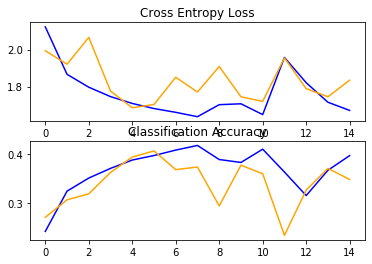

In [22]:
summarize_diagnostics(history_norm)

# add batch normalization and compare learning curves

In [25]:
model_bn = Sequential()
model_bn.add(Flatten(input_shape=(32,32,3)))
model_bn.add(BatchNormalization())
for _ in range(21):
    model_bn.add(Dense(100, kernel_initializer='he_normal'))
    model_bn.add(BatchNormalization())
    model_bn.add(ELU(alpha=1.0))
model_bn.add(Dense(10, activation='softmax'))
optimizer = tf.keras.optimizers.Nadam(lr=0.45)
model_bn.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [26]:
history_bn = model_bn.fit(x_train_scale, y_train, validation_split=.15, epochs=100, callbacks=[early_stopping_cb])

Train on 42500 samples, validate on 7500 samples
Epoch 1/100
42500/42500 [==============================] - 30s 702us/sample - loss: 1.8449 - accuracy: 0.3392 - val_loss: 1.8124 - val_accuracy: 0.3627
Epoch 2/100
42500/42500 [==============================] - 20s 482us/sample - loss: 1.6961 - accuracy: 0.3957 - val_loss: 1.7186 - val_accuracy: 0.3979
Epoch 3/100
42500/42500 [==============================] - 21s 488us/sample - loss: 1.6225 - accuracy: 0.4221 - val_loss: 1.6255 - val_accuracy: 0.4145
Epoch 4/100
42500/42500 [==============================] - 21s 492us/sample - loss: 1.5774 - accuracy: 0.4418 - val_loss: 1.7204 - val_accuracy: 0.3897
Epoch 5/100
42500/42500 [==============================] - 21s 494us/sample - loss: 1.5573 - accuracy: 0.4451 - val_loss: 1.5730 - val_accuracy: 0.4324
Epoch 6/100
42500/42500 [==============================] - 22s 514us/sample - loss: 1.5012 - accuracy: 0.4658 - val_loss: 1.4760 - val_accuracy: 0.4792
Epoch 7/100
42500/42500 [==============

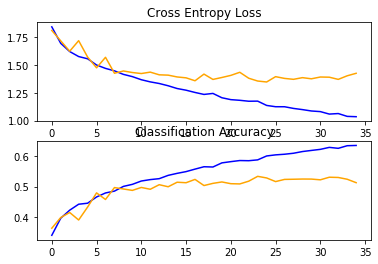

In [27]:
summarize_diagnostics(history_bn)

In [20]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    pyplot.close()

# Replace Batch Normalization with SELU and make adjustments to ensure network self normalizes (standardize input features, use LeCun normal initialization, only contains sequence of dense layers).

In [10]:
X_means = x_train.mean(axis=0)
X_stds = x_train.std(axis=0)
X_train_norm = (x_train - X_means) / X_stds
X_test_norm = (x_test - X_means) / X_stds

In [7]:
model_selu = Sequential()
model_selu.add(Flatten(input_shape=[32, 32, 3]))
for _ in range(21):
    model_selu.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model_selu.add(Dense(10, activation='softmax'))
optimizer = tf.keras.optimizers.Nadam(lr=7e-4)
model_selu.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [12]:
history_selu = model_selu.fit(X_train_norm, y_train, validation_split=.15, epochs=100, callbacks=[early_stopping_cb])

Train on 42500 samples, validate on 7500 samples
Epoch 1/100
42500/42500 [==============================] - 17s 406us/sample - loss: 2.0126 - accuracy: 0.2721 - val_loss: 2.0743 - val_accuracy: 0.2229
Epoch 2/100
42500/42500 [==============================] - 13s 313us/sample - loss: 1.8114 - accuracy: 0.3455 - val_loss: 1.9830 - val_accuracy: 0.2535
Epoch 3/100
42500/42500 [==============================] - 16s 379us/sample - loss: 1.7186 - accuracy: 0.3823 - val_loss: 1.8943 - val_accuracy: 0.3044
Epoch 4/100
42500/42500 [==============================] - 14s 329us/sample - loss: 1.6562 - accuracy: 0.4081 - val_loss: 1.7203 - val_accuracy: 0.3727
Epoch 5/100
42500/42500 [==============================] - 16s 376us/sample - loss: 1.6092 - accuracy: 0.4284 - val_loss: 1.6558 - val_accuracy: 0.4119
Epoch 6/100
42500/42500 [==============================] - 17s 392us/sample - loss: 1.5706 - accuracy: 0.4450 - val_loss: 1.7290 - val_accuracy: 0.4113
Epoch 7/100
42500/42500 [==============

In [14]:
model_selu.evaluate(X_test_norm, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.4828130821228027, 0.4771]

# Regularize with alpha dropout.


In [17]:
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=[32, 32, 3]))
for _ in range(21):
    model_dropout.add(Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model_dropout.add(tf.keras.layers.AlphaDropout(rate=0.1))
model_dropout.add(Dense(10, activation='softmax'))
optimizer = tf.keras.optimizers.Nadam(lr=5e-4)
model_dropout.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model_dropout.fit(X_train_norm, y_train, epochs=100, validation_split=.15,  callbacks=[early_stopping_cb])

Train on 42500 samples, validate on 7500 samples
Epoch 1/100
